# Heart Disease Data Cleaning and Exploration

## 1. Load the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_heart = pd.read_csv('heart.csv')

## 2. Initial Data Exploration

In [2]:
# 1. Display the first 5 rows
print("First 5 rows:")
print(df_heart.head())

First 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [3]:
# 2. Display the last 5 rows
print("Last 5 rows:")
print(df_heart.tail())

Last 5 rows:
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  


In [4]:
# 3. Get a summary of the dataframe
print("Dataframe Info:")
print(df_heart.info())

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [5]:
# 4. Get descriptive statistics
print("Descriptive Statistics:")
print(df_heart.describe())

Descriptive Statistics:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000    

In [6]:
# 5. Check the dimensions of the dataframe
print("Dataframe Shape:")
print(df_heart.shape)

Dataframe Shape:
(1025, 14)


## 3. Handling Missing Data

In [7]:
# 6. Check for missing values in each column
print("Missing Values per Column:")
print(df_heart.isnull().sum())

Missing Values per Column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


## 4. Data Cleaning and Transformation

In [8]:
# 7. Rename columns for better readability
df_heart.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [9]:
# 8. Convert categorical variables to 'category' type
categorical_cols = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
for col in categorical_cols:
    df_heart[col] = df_heart[col].astype('category')

## 5. Handling Duplicates

In [10]:
# 9. Check for duplicate rows
print(f'Number of duplicate rows: {df_heart.duplicated().sum()}')

Number of duplicate rows: 723


In [11]:
# 10. Remove duplicate rows
df_heart.drop_duplicates(inplace=True)

## 6. Handling Outliers

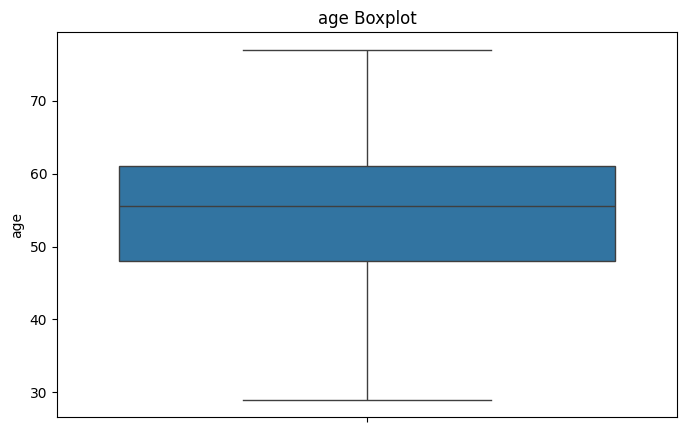

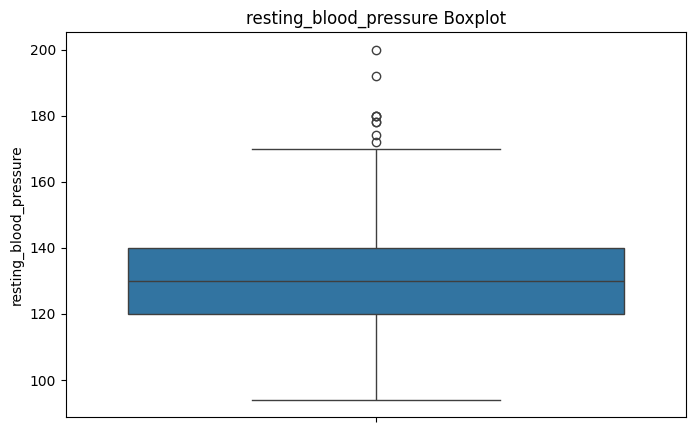

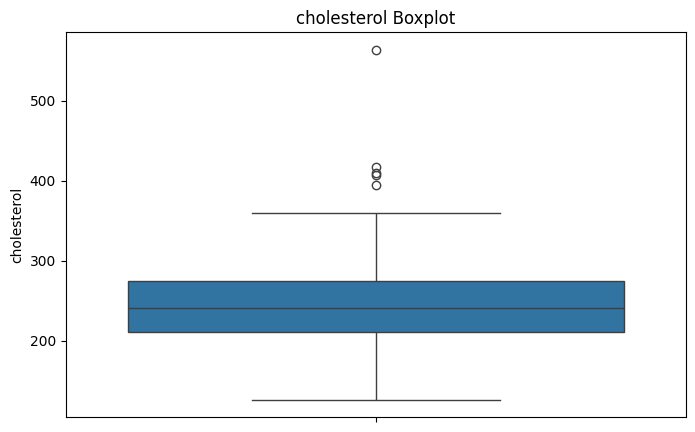

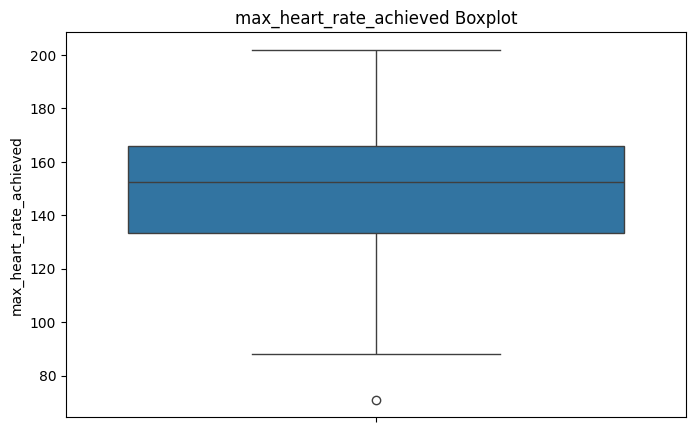

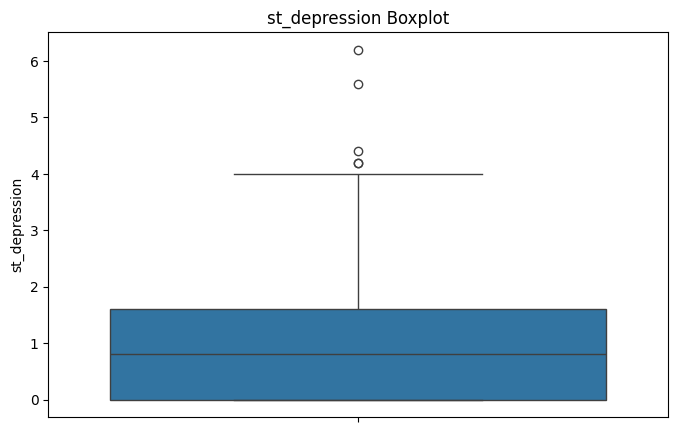

In [12]:
# 11. Visualize distributions of numerical columns
numerical_cols = df_heart.select_dtypes(include=np.number).columns.tolist()
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df_heart[col])
    plt.title(f'{col} Boxplot')
    plt.show()

In [13]:
# 12. Remove outliers from 'resting_blood_pressure' using IQR
Q1 = df_heart['resting_blood_pressure'].quantile(0.25)
Q3 = df_heart['resting_blood_pressure'].quantile(0.75)
IQR = Q3 - Q1
df_heart = df_heart[~((df_heart['resting_blood_pressure'] < (Q1 - 1.5 * IQR)) | (df_heart['resting_blood_pressure'] > (Q3 + 1.5 * IQR)))]

In [14]:
# 13. Remove outliers from 'cholesterol' using IQR
Q1 = df_heart['cholesterol'].quantile(0.25)
Q3 = df_heart['cholesterol'].quantile(0.75)
IQR = Q3 - Q1
df_heart = df_heart[~((df_heart['cholesterol'] < (Q1 - 1.5 * IQR)) | (df_heart['cholesterol'] > (Q3 + 1.5 * IQR)))]

In [15]:
# 14. Remove outliers from 'max_heart_rate_achieved' using IQR
Q1 = df_heart['max_heart_rate_achieved'].quantile(0.25)
Q3 = df_heart['max_heart_rate_achieved'].quantile(0.75)
IQR = Q3 - Q1
df_heart = df_heart[~((df_heart['max_heart_rate_achieved'] < (Q1 - 1.5 * IQR)) | (df_heart['max_heart_rate_achieved'] > (Q3 + 1.5 * IQR)))]

## 7. Feature Engineering

In [16]:
# 15. Create age groups
df_heart['age_group'] = pd.cut(df_heart['age'], bins=[0, 40, 50, 60, 100], labels=['Young', 'Middle-aged', 'Senior', 'Elderly'])

In [17]:
# 16. Create cholesterol levels
df_heart['cholesterol_level'] = pd.cut(df_heart['cholesterol'], bins=[0, 200, 240, 500], labels=['Normal', 'Borderline High', 'High'])

In [18]:
# 17. Create blood pressure categories
df_heart['bp_category'] = pd.cut(df_heart['resting_blood_pressure'], bins=[0, 120, 130, 140, 200], labels=['Normal', 'Elevated', 'High BP Stage 1', 'High BP Stage 2'])

## 8. Final Exploration

In [19]:
# 18. Show the cleaned data's first 5 rows
print("Cleaned Data Head:")
print(df_heart.head())

Cleaned Data Head:
   age sex chest_pain_type  resting_blood_pressure  cholesterol  \
0   52   1               0                     125          212   
1   53   1               0                     140          203   
2   70   1               0                     145          174   
3   61   1               0                     148          203   
4   62   0               0                     138          294   

  fasting_blood_sugar rest_ecg  max_heart_rate_achieved  \
0                   0        1                      168   
1                   1        0                      155   
2                   0        1                      125   
3                   0        1                      161   
4                   1        1                      106   

  exercise_induced_angina  st_depression st_slope num_major_vessels  \
0                       0            1.0        2                 2   
1                       1            3.1        0                 0   
2         

In [20]:
# 19. Show the cleaned data's info
print("Cleaned Data Info:")
print(df_heart.info())

Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 287 entries, 0 to 878
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      287 non-null    int64   
 1   sex                      287 non-null    category
 2   chest_pain_type          287 non-null    category
 3   resting_blood_pressure   287 non-null    int64   
 4   cholesterol              287 non-null    int64   
 5   fasting_blood_sugar      287 non-null    category
 6   rest_ecg                 287 non-null    category
 7   max_heart_rate_achieved  287 non-null    int64   
 8   exercise_induced_angina  287 non-null    category
 9   st_depression            287 non-null    float64 
 10  st_slope                 287 non-null    category
 11  num_major_vessels        287 non-null    category
 12  thalassemia              287 non-null    category
 13  target                   287 non-null    category
 

In [21]:
# 20. Show the cleaned data's description
print("Cleaned Data Description:")
print(df_heart.describe())

Cleaned Data Description:
              age  resting_blood_pressure  cholesterol  \
count  287.000000              287.000000   287.000000   
mean    54.083624              130.003484   242.411150   
std      9.081217               15.434612    44.951702   
min     29.000000               94.000000   126.000000   
25%     47.000000              120.000000   210.500000   
50%     55.000000              130.000000   239.000000   
75%     60.000000              140.000000   271.000000   
max     77.000000              170.000000   360.000000   

       max_heart_rate_achieved  st_depression  
count               287.000000     287.000000  
mean                149.675958       1.009756  
std                  22.717855       1.133891  
min                  88.000000       0.000000  
25%                 132.500000       0.000000  
50%                 152.000000       0.600000  
75%                 167.500000       1.600000  
max                 202.000000       6.200000  


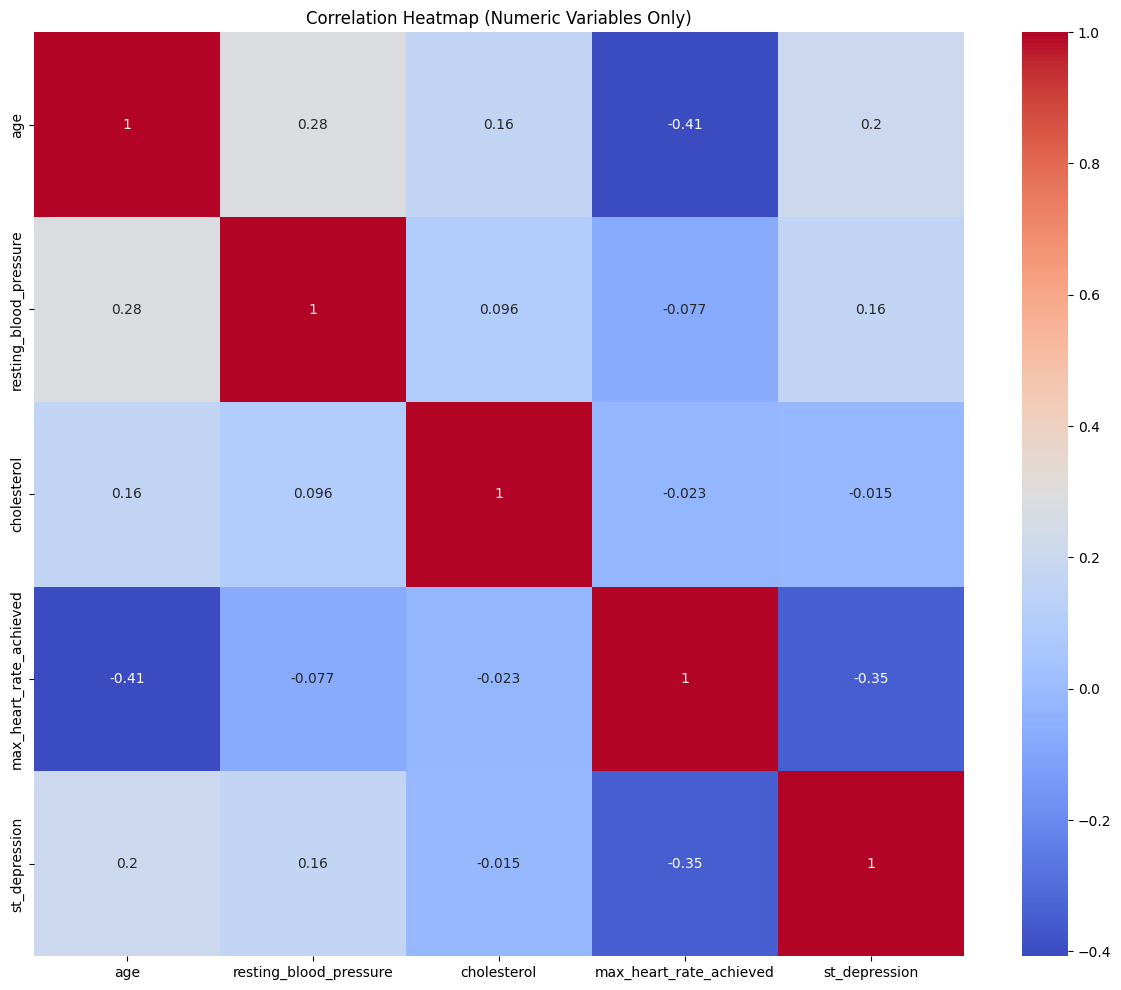

In [24]:
# 21. Correlation heatmap
plt.figure(figsize=(15, 12))
# Select only numeric columns for correlation
numeric_df = df_heart.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Variables Only)')
plt.show()

In [ ]:
# 22. Target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df_heart)
plt.title('Target Distribution')
plt.show()

In [ ]:
# 23. Age distribution by target
plt.figure(figsize=(10, 6))
sns.histplot(data=df_heart, x='age', hue='target', multiple='stack', kde=True)
plt.title('Age Distribution by Target')
plt.show()

In [ ]:
# 24. Chest pain type vs. target
plt.figure(figsize=(8, 5))
sns.countplot(x='chest_pain_type', hue='target', data=df_heart)
plt.title('Chest Pain Type vs. Target')
plt.show()

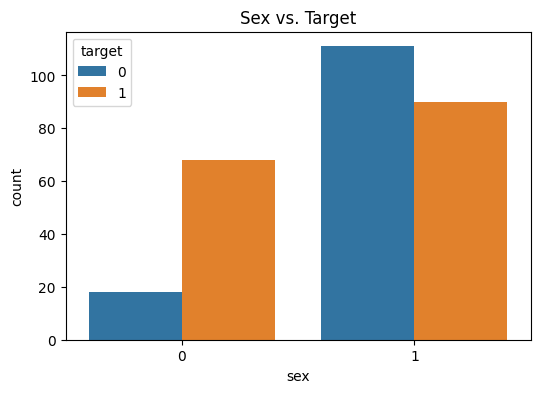

In [23]:
# 25. Sex vs. target
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', hue='target', data=df_heart)
plt.title('Sex vs. Target')
plt.show()